# Indice

1. [🎓 Abstracto](#abstracto)
2. [🧾 Contexto analítico](#-Contexto-analitico)
3. [🎯 Objetivo](#-Objetivo)
4. [🔍 Análisis exploratorio de datos (EDA)](#-Analisis-explotatorio-de-datos-EDA)
   - [Importación de librerías y carga del dataset](#Importación-de-librerías-y-carga-del-dataset)
   - [Inspección inicial del dataset](#Inspección-inicial-del-dataset)
   - [Limpieza de datos](#Limpieza-de-datos)
5. [📊 Hipótesis](#-Hipótesis)
   - [Hipótesis #1: Calidad del profesor](#-Hipótesis-1)
   - [Hipótesis #2: Horas de estudio](#-Hipótesis-2)
   - [Hipótesis #3: Asistencia a clases](#-Hipótesis-3)
   - [Hipótesis #4: Acceso a recursos educativos](#-Hipótesis-4)
   - [Hipótesis #5: Tipo de escuela](#-Hipótesis-5)
6. [📊 Correlaciones](#-Corrrelaciones)
7. [📈 Modelo de regresión lineal](#-Modelo-de-regresión-lineal)
   - [Separación de variables](#Separación-de-variables)
   - [Entrenamiento del modelo](#Entrenamiento-del-modelo)
   - [Evaluación del modelo](#Evaluación-del-modelo)
8. [📊 Inclusión de variables categóricas](#-Inclusión-de-variables-categóricas)
9. [📌 Conclusiones](#-Conclusión)

<h2 id="abstracto">🎓 Abstracto</h2>

En esta investigacion se analiza como diverso factores influyen en el rendimiento academico de los estudiantes. Utilizando el dataset `StudentPerformanceFactors.csv` de Kaggle, se analiza facores como la calidad del profesor, las horas de estudio semanales, la asistencia a clases y otros aspectos que provee el dataset.
Dicho dataset se compone de 6607 filas y 20 columnas, las cuales son: 

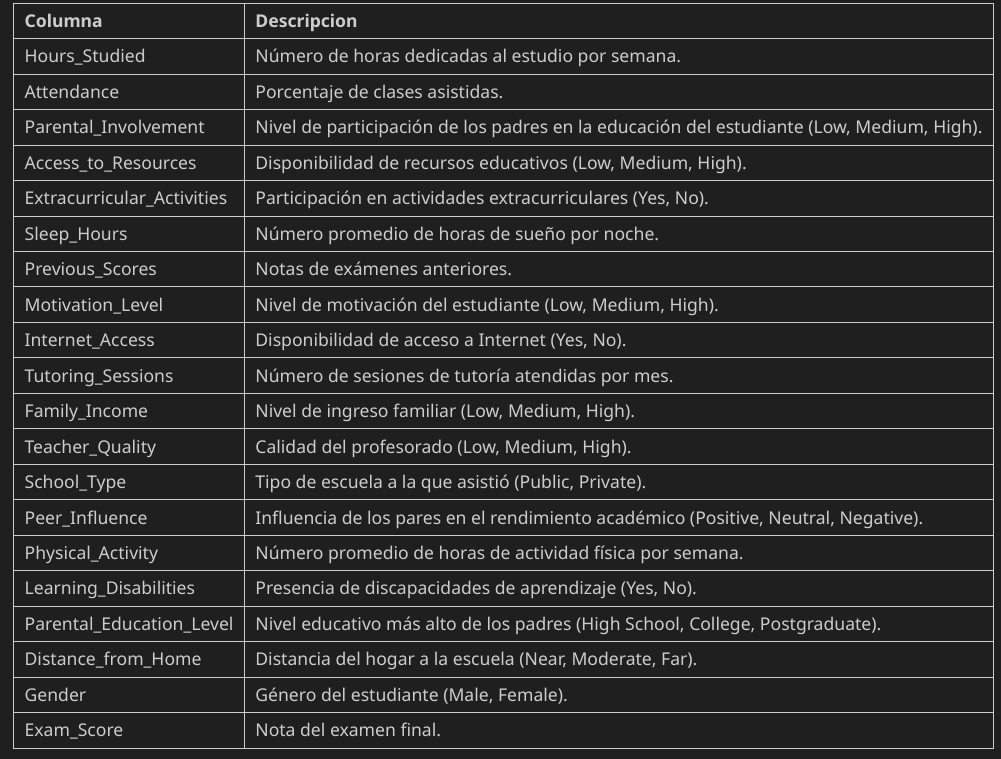




<h2 id="contexto-analitico">🧾 Contexto analitico</h2>
El rendimiento academico de los estudiantes es un tema de interes tanto para profesores como para alumnos. Comprender que factores influyen en la nota final de un examen es fundamental para poder obtener el exito academico.

<h2 id="objetivo">🎯 Objetivo</h2> 
El objetivo de esta investigacion es entender que factores afectan a la nota final de los estudiantes con el fin de poder predecir que nota final tendran otros estudiante segun los factores analizados.

<h2 id="-Analisis-explotatorio-de-datos-EDA">🔍 Analisis explotatorio de datos (EDA)</h2>

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [129]:
archivo = "./StudentPerformanceFactors.csv"
student_performance = pd.read_csv(archivo)
student_performance.shape

(6607, 20)

In [130]:
student_performance.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [131]:
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [132]:
student_performance.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


### 🔍 Variables con Datos Faltantes

Las siguientes variables contienen datos faltantes:
- **Distance_from_Home**
- **Parental_Education_Level**
- **Teacher_Quality**

> También se observa que la variable **Exam_Score** tiene un valor inusual de 101. 

Se procederá a realizar una limpieza de estos datos.

In [133]:
print(student_performance["Distance_from_Home"].value_counts(dropna=False),"\n")
print(student_performance["Parental_Education_Level"].value_counts(dropna=False),"\n")
print(student_performance["Teacher_Quality"].value_counts(dropna=False))

Distance_from_Home
Near        3884
Moderate    1998
Far          658
NaN           67
Name: count, dtype: int64 

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
NaN               90
Name: count, dtype: int64 

Teacher_Quality
Medium    3925
High      1947
Low        657
NaN         78
Name: count, dtype: int64


In [134]:
student_performance.dropna(inplace=True)
student_performance["Exam_Score"] = student_performance["Exam_Score"].replace(101,100)

In [135]:
student_performance.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## 📊 Hipótesis #1

**Si la calidad del profesor es alta, la nota promedio de los alumnos aumentará.**

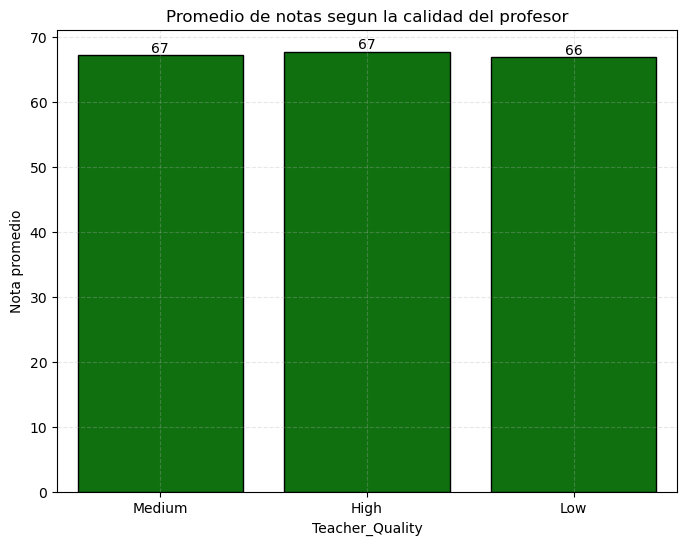

In [136]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=student_performance, x="Teacher_Quality", y="Exam_Score",estimator="mean", errorbar=None ,color="green",edgecolor="black")
for bar in ax.patches:
    ax.annotate(text=int(bar.get_height()),xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),ha="center",va="bottom",fontsize=10,color="black")
plt.title("Promedio de notas segun la calidad del profesor")
plt.ylabel("Nota promedio")
plt.grid(linestyle="--",alpha=0.30)

plt.show()

### 📌 Conclusión

Se concluye que la nota no se ve influenciada por la calidad del profesor.

## 📊 Hipótesis #2

**A mayor cantidad de horas de estudio semanales, mayor será la nota promedio en los exámenes.**

Correlacion entre la nota del examen y horas de estudio semanal: 0.45


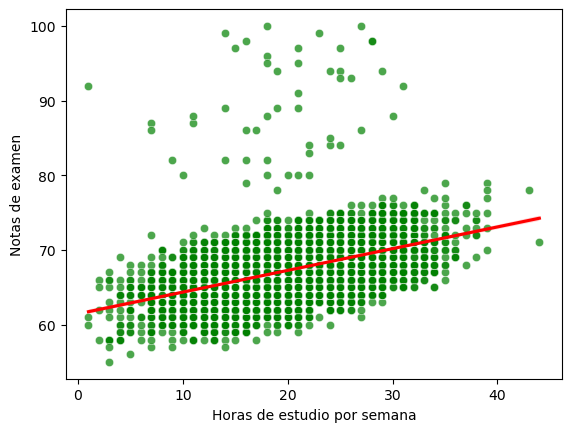

In [137]:
correlacion = student_performance["Exam_Score"].corr(student_performance["Hours_Studied"])
print(f"Correlacion entre la nota del examen y horas de estudio semanal: {correlacion:.2f}")
sns.scatterplot(data=student_performance,x="Hours_Studied",y="Exam_Score",alpha=0.7, color="green")
sns.regplot(data=student_performance,x="Hours_Studied",y="Exam_Score",scatter=False, color="red" )
plt.xlabel("Horas de estudio por semana")
plt.ylabel("Notas de examen")
plt.show()

### 📌 Conclusión

Existe una correlación moderada positiva entre las horas de estudio semanales y la nota del examen. Por lo tanto, se puede concluir que las horas de estudio semanales influyen moderadamente en la nota.

## 📊 Hipótesis #3

**Los alumnos que asisten más a clases tienen mejores notas.**

Correlacion entre la nota de examen y el porcentaje de asistencia: 0.58


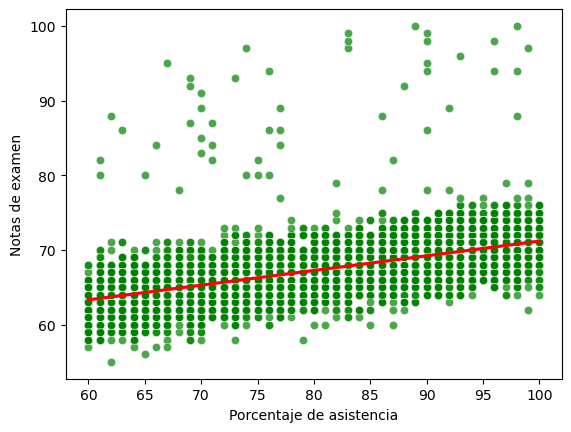

In [138]:
correlacion = student_performance["Exam_Score"].corr(student_performance["Attendance"])
print(f"Correlacion entre la nota de examen y el porcentaje de asistencia: {correlacion:.2f}")
sns.scatterplot(data=student_performance,x="Attendance",y="Exam_Score",alpha=0.7, color="green")
sns.regplot(data=student_performance,x="Attendance",y="Exam_Score",scatter=False, color="red" )
plt.xlabel("Porcentaje de asistencia")
plt.ylabel("Notas de examen")
plt.show() 

### 📌 Conclusión

Existe una correlación moderada positiva entre el porcentaje de asistencia y la nota. Por lo tanto, se puede concluir que la asistencia a clases influye moderadamente en la nota.

## 📊 Hipótesis #4

**Los estudiantes con acceso a recursos educativos tienen mejores notas promedio.**

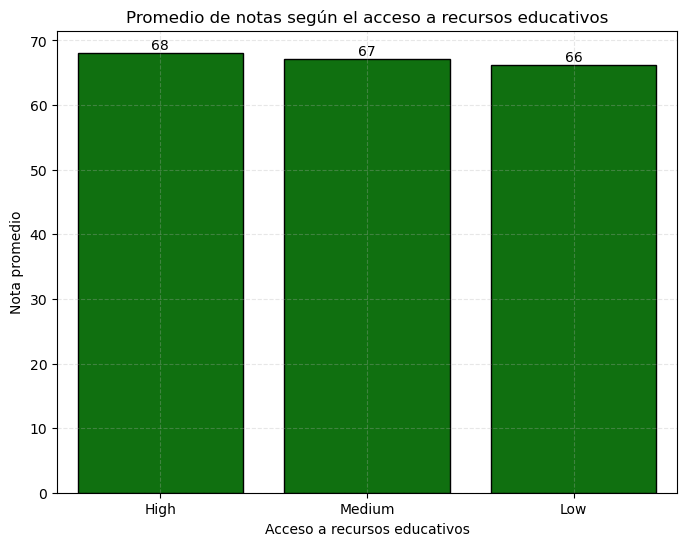

In [139]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=student_performance, x="Access_to_Resources", y="Exam_Score", estimator="mean", errorbar=None, color="green", edgecolor="black")
for bar in ax.patches:
    ax.annotate(text=int(bar.get_height()), xy=(bar.get_x() + bar.get_width()/2, bar.get_height()), ha="center", va="bottom", fontsize=10, color="black")
plt.title("Promedio de notas según el acceso a recursos educativos")
plt.ylabel("Nota promedio")
plt.xlabel("Acceso a recursos educativos")
plt.grid(linestyle="--", alpha=0.30)
plt.show()

### 📌 Conclusión

Se llega a la conclusión de que el acceso a recursos educativos no parece tener un impacto significativo en el promedio de las notas de los estudiantes.

## 📊 Hipótesis #5

**Los alumnos en escuelas privadas tienen notas promedio más altas que los alumnos de escuelas públicas.**

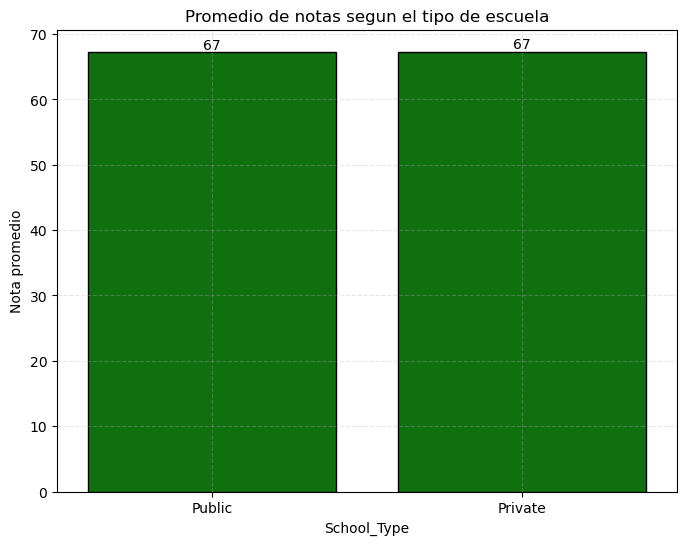

In [140]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=student_performance, x="School_Type", y="Exam_Score",estimator="mean", errorbar=None ,color="green",edgecolor="black")
for bar in ax.patches:
    ax.annotate(text=int(bar.get_height()),xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),ha="center",va="bottom",fontsize=10,color="black")
plt.title("Promedio de notas segun el tipo de escuela")
plt.ylabel("Nota promedio")
plt.grid(linestyle="--",alpha=0.30)
plt.show()

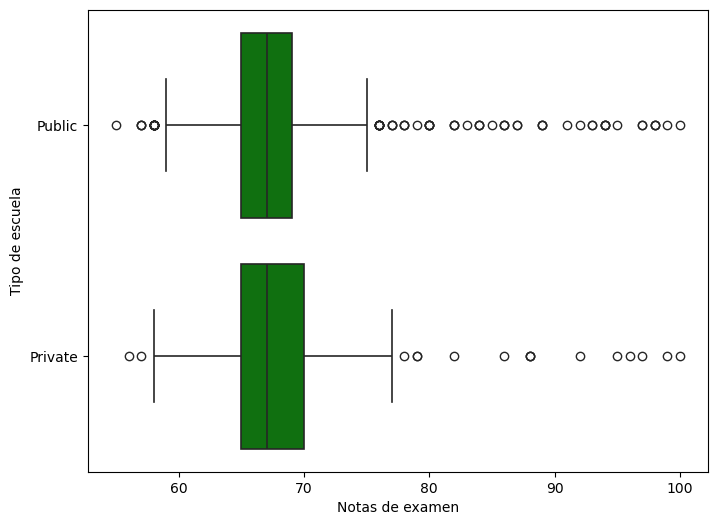

In [141]:
plt.figure(figsize=(8,6))
sns.boxplot(data=student_performance, x="Exam_Score", y="School_Type",color="green",linewidth=1.2)
plt.xlabel("Notas de examen")
plt.ylabel("Tipo de escuela")
plt.show()

In [142]:
print("Estadisticas de las notas de las escuelas publicas")
print(student_performance.loc[student_performance["School_Type"] == "Public"]["Exam_Score"].describe())
print("Estadisticas de las notas de las escuelas privadas")
print(student_performance.loc[student_performance["School_Type"] == "Private"]["Exam_Score"].describe())

Estadisticas de las notas de las escuelas publicas
count    4434.000000
mean       67.223726
std         3.928014
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       100.000000
Name: Exam_Score, dtype: float64
Estadisticas de las notas de las escuelas privadas
count    1944.000000
mean       67.316358
std         3.878391
min        56.000000
25%        65.000000
50%        67.000000
75%        70.000000
max       100.000000
Name: Exam_Score, dtype: float64


### 📌 Conclusión

Se observa que:

1. La nota promedio de los estudiantes de escuelas privadas y públicas es prácticamente la misma.
2. Las notas de las escuelas privadas están levemente más dispersas que las de las escuelas públicas.
3. Tanto las escuelas públicas como privadas tienen valores atípicos.

Por lo tanto, según lo analizado, el tipo de escuela no influye significativamente en la nota obtenida.

## Corrrelaciones



Para verificar las correlacion tengo que separar el dataset en dos, uno que tenga las columnas numericas y otro que tenga las columnas categoricas.

In [143]:
numericas = student_performance.select_dtypes("Int64")

In [144]:
numericas.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70


Se verifica que variables numericas se tienen mayor correlacion con "Score_Exam"

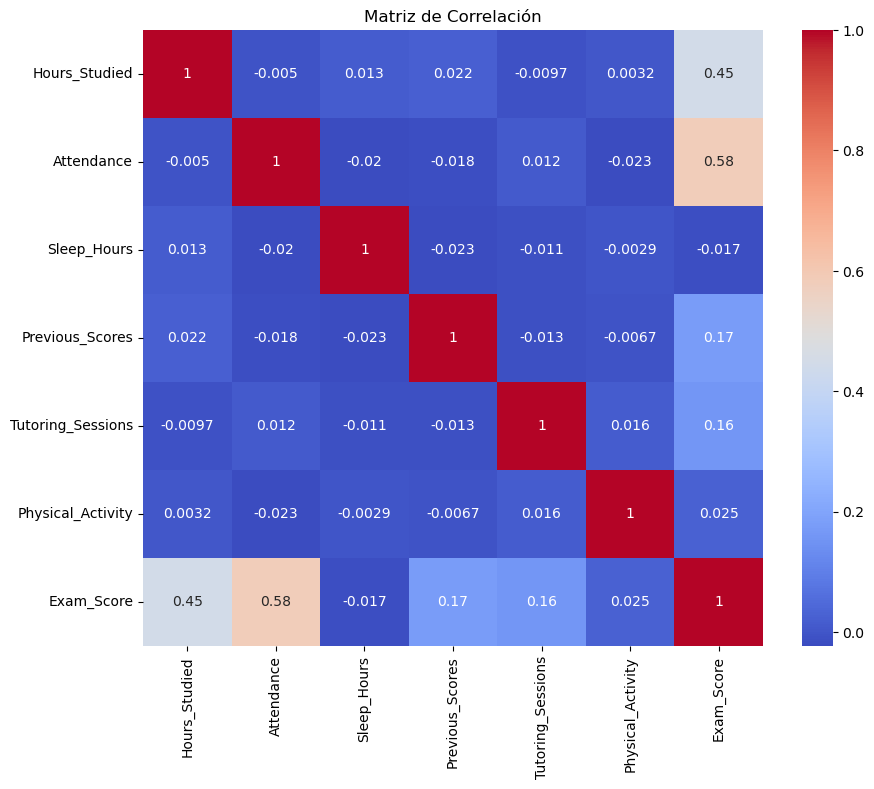

In [145]:
correlation_matrix = numericas.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

"Hours_Studied", "Attendance", "Previous_Scores" y "Tutoring_Sessions" son las variables que tienen mejor correlacion, dichas variables se utilizaran para entrerar un modelo de regresion lineal 

In [146]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Separo las variables dependientes de la variable independiente

In [147]:
x = student_performance[["Hours_Studied", "Attendance", "Previous_Scores", "Tutoring_Sessions"]]
y = student_performance["Exam_Score"]

Separo el set de datos un 20% para prueba y el 80% para entrenar

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [149]:
lin_reg = LinearRegression() #Instancio
lin_reg.fit(x_train, y_train)

LinearRegression()

In [150]:
y_pred = lin_reg.predict(x_test)

Genero un grafico con los datos obtenidos. Y corroboro las metricas

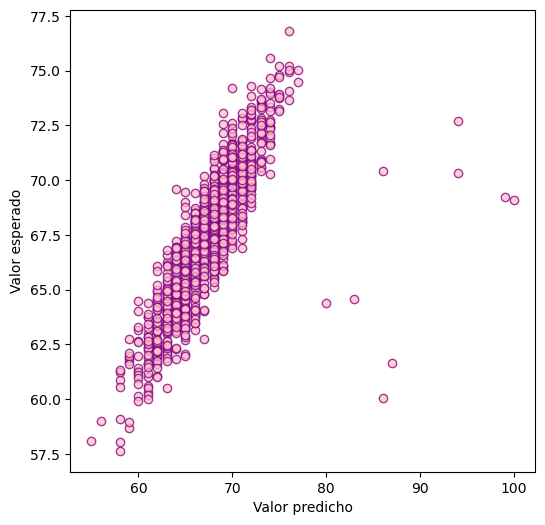

Error Absoluto - M:  30.905263440684664
Error Absoluto Medio - MAE:  1.329892368517418
Error Cuadratico Medio - MSE:  6.06746304192175
Raiz cuadrada MSE - RMSE:  2.463222085383644
Coeficiente de determinacion - R2:  0.6095414024093199


In [151]:
# grafico
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred,alpha=0.75,color="pink" ,edgecolors="purple")
plt.ylabel("Valor esperado")
plt.xlabel("Valor predicho")
plt.show()

print("Error Absoluto - M: ",max_error(y_test, y_pred))
print("Error Absoluto Medio - MAE: ",mean_absolute_error(y_test, y_pred))
print("Error Cuadratico Medio - MSE: ",mean_squared_error(y_test, y_pred))
print("Raiz cuadrada MSE - RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coeficiente de determinacion - R2: ", lin_reg.score(x_test, y_test))

### 📌 Conclusión

Se puede observar que este modelo explica un casi un 61% la variabilidad en las notas del examen basandose en las variables "Hours_Studied", "Attendance", "Previous_Scores", "Tutoring_Sessions" (R2)
Ademas podemos ver que el modelo tiene, en promedio, un error de predicion de aproximadamente 2.46 puntos en la escala de notas del examen. 




Probemos ahora agregando las variables categoricas, pero antes debemos hacer una transformacion de los datos a numeros

In [152]:
from sklearn.preprocessing import LabelEncoder
categoricas = student_performance.select_dtypes(include=['object']).columns
label_encoders = {}

for column in categoricas:
    le = LabelEncoder()
    student_performance[column] = le.fit_transform(student_performance[column])
    label_encoders[column] = le

### Verificación de la transformación

Se imprimen las primeras filas del dataset transformado para verificar los cambios.

In [153]:
student_performance.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


In [160]:
student_performance.corr()["Exam_Score"].sort_values(ascending=False)

Exam_Score                    1.000000
Attendance                    0.580394
Hours_Studied                 0.445209
Previous_Scores               0.174292
Tutoring_Sessions             0.156769
Peer_Influence                0.099124
Distance_from_Home            0.088142
Extracurricular_Activities    0.063051
Internet_Access               0.051281
Parental_Education_Level      0.040824
Physical_Activity             0.025155
Gender                       -0.004887
School_Type                  -0.010898
Sleep_Hours                  -0.017149
Motivation_Level             -0.017748
Family_Income                -0.022593
Teacher_Quality              -0.059210
Learning_Disabilities        -0.083926
Access_to_Resources          -0.088556
Parental_Involvement         -0.094060
Name: Exam_Score, dtype: float64

Selecciono aquellas variables que tengan una correlacion absoluta mayor al 2%

In [155]:
x = student_performance[["Hours_Studied", "Attendance", "Previous_Scores", "Tutoring_Sessions"
                         ,"Peer_Influence","Distance_from_Home","Extracurricular_Activities"
                         ,"Parental_Involvement","Teacher_Quality","Learning_Disabilities"
                         ,"Access_to_Resources","Parental_Involvement"]]
y = student_performance["Exam_Score"]

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [157]:
lin_reg2 = LinearRegression() #Instancio
lin_reg2.fit(x_train, y_train)

LinearRegression()

In [158]:
y_pred = lin_reg2.predict(x_test)

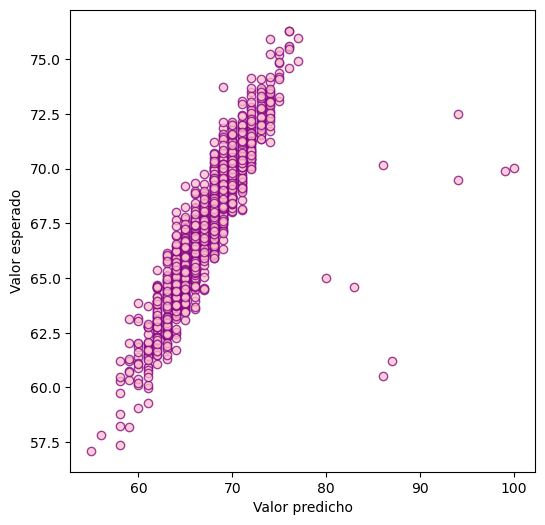

Error Absoluto - M:  29.974242016758495
Error Absoluto Medio - MAE:  1.1112269658492322
Error Cuadratico Medio - MSE:  5.301890986384343
Raiz cuadrada MSE - RMSE:  2.302583546016158
Coeficiente de determinacion - R2:  0.6588081534540978


In [159]:
# grafico
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred,alpha=0.75,color="pink" ,edgecolors="purple")
plt.ylabel("Valor esperado")
plt.xlabel("Valor predicho")
plt.show()

print("Error Absoluto - M: ",max_error(y_test, y_pred))
print("Error Absoluto Medio - MAE: ",mean_absolute_error(y_test, y_pred))
print("Error Cuadratico Medio - MSE: ",mean_squared_error(y_test, y_pred))
print("Raiz cuadrada MSE - RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coeficiente de determinacion - R2: ", lin_reg2.score(x_test, y_test))

### 📌 Conclusión

Con esta mejora, el modelo explica aproximadamente un 66% la variabilidad en las notas del examen basandose en las variables que agregamos(R2)
Ademas podemos ver que el modelo tiene, en promedio, un error de predicion de aproximadamente 2.30 puntos en la escala de notas del examen. 

Por lo que esta prediccion es levemente mejor que la anterior


